In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

In [39]:
data = pd.read_csv("/content/raw_house_data.csv")


In [40]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [41]:
data.tail()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4,4,4317,None,"Compactor, Dishwasher, Double Sink, Island, Ap...",3,"Carpet, Mexican Tile",None


In [42]:
data.shape

(5000, 16)

In [43]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [44]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [45]:
data.columns


Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [46]:
data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [47]:
data['bedrooms'].unique()

array([13,  2,  7,  4,  3,  9,  6,  5,  1, 19,  8, 10, 18, 11, 36])

In [48]:
#Cleaning The Data

In [49]:
## Replacing unwanted value using for loop
data['sqrt_ft']=data['sqrt_ft'].str.replace('None' , '0', regex=True)
data['HOA']=data['HOA'].str.replace ('None' , '0', regex=True)
data['HOA']=data['HOA'].str.replace('.' , '' , regex=True)
data['garage']=data['garage'].str.replace('None' , '0' , regex=True)
data['kitchen_features']=data['kitchen_features'].str.replace('.' , '' , regex=True)
data['floor_covering']=data['floor_covering'].str.replace('.' , '' , regex=True)



In [50]:
## Create two columns containing the number of kitchen features and flor coverings by counting "," values +1 to include the first feature
data['kitchen_feature_count'] = data['kitchen_features'].str.count(",") +1
data['floor_covering_count'] = data['floor_covering'].str.count(",") +1

In [51]:
#converting columns in to numric values 
data['sqrt_ft'] = pd.to_numeric(data['sqrt_ft'])
data['garage'] = pd.to_numeric(data['garage'])
data['taxes'] = pd.to_numeric(data['taxes'])
data['lot_acres'] = pd.to_numeric(data['lot_acres'])
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])

In [52]:
#Coverting as float values 
data['latitude']=data['latitude'].astype(float)
data['longitude']=data['longitude'].astype(float)


In [53]:
df= data


In [54]:
df = data.drop(['floor_covering' , 'kitchen_features'] , axis=1)

In [55]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,kitchen_feature_count,floor_covering_count
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0.0,6,0,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0.0,5,0,2,2
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0.0,0.0,5,0,3,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4.0,4,0,4,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396.0,3.0,5,55,5,2


In [56]:
corelation = df.corr()

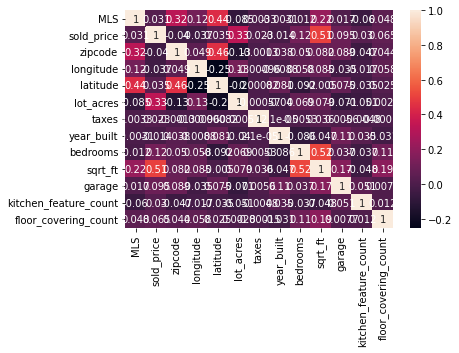

In [57]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns , annot=True)

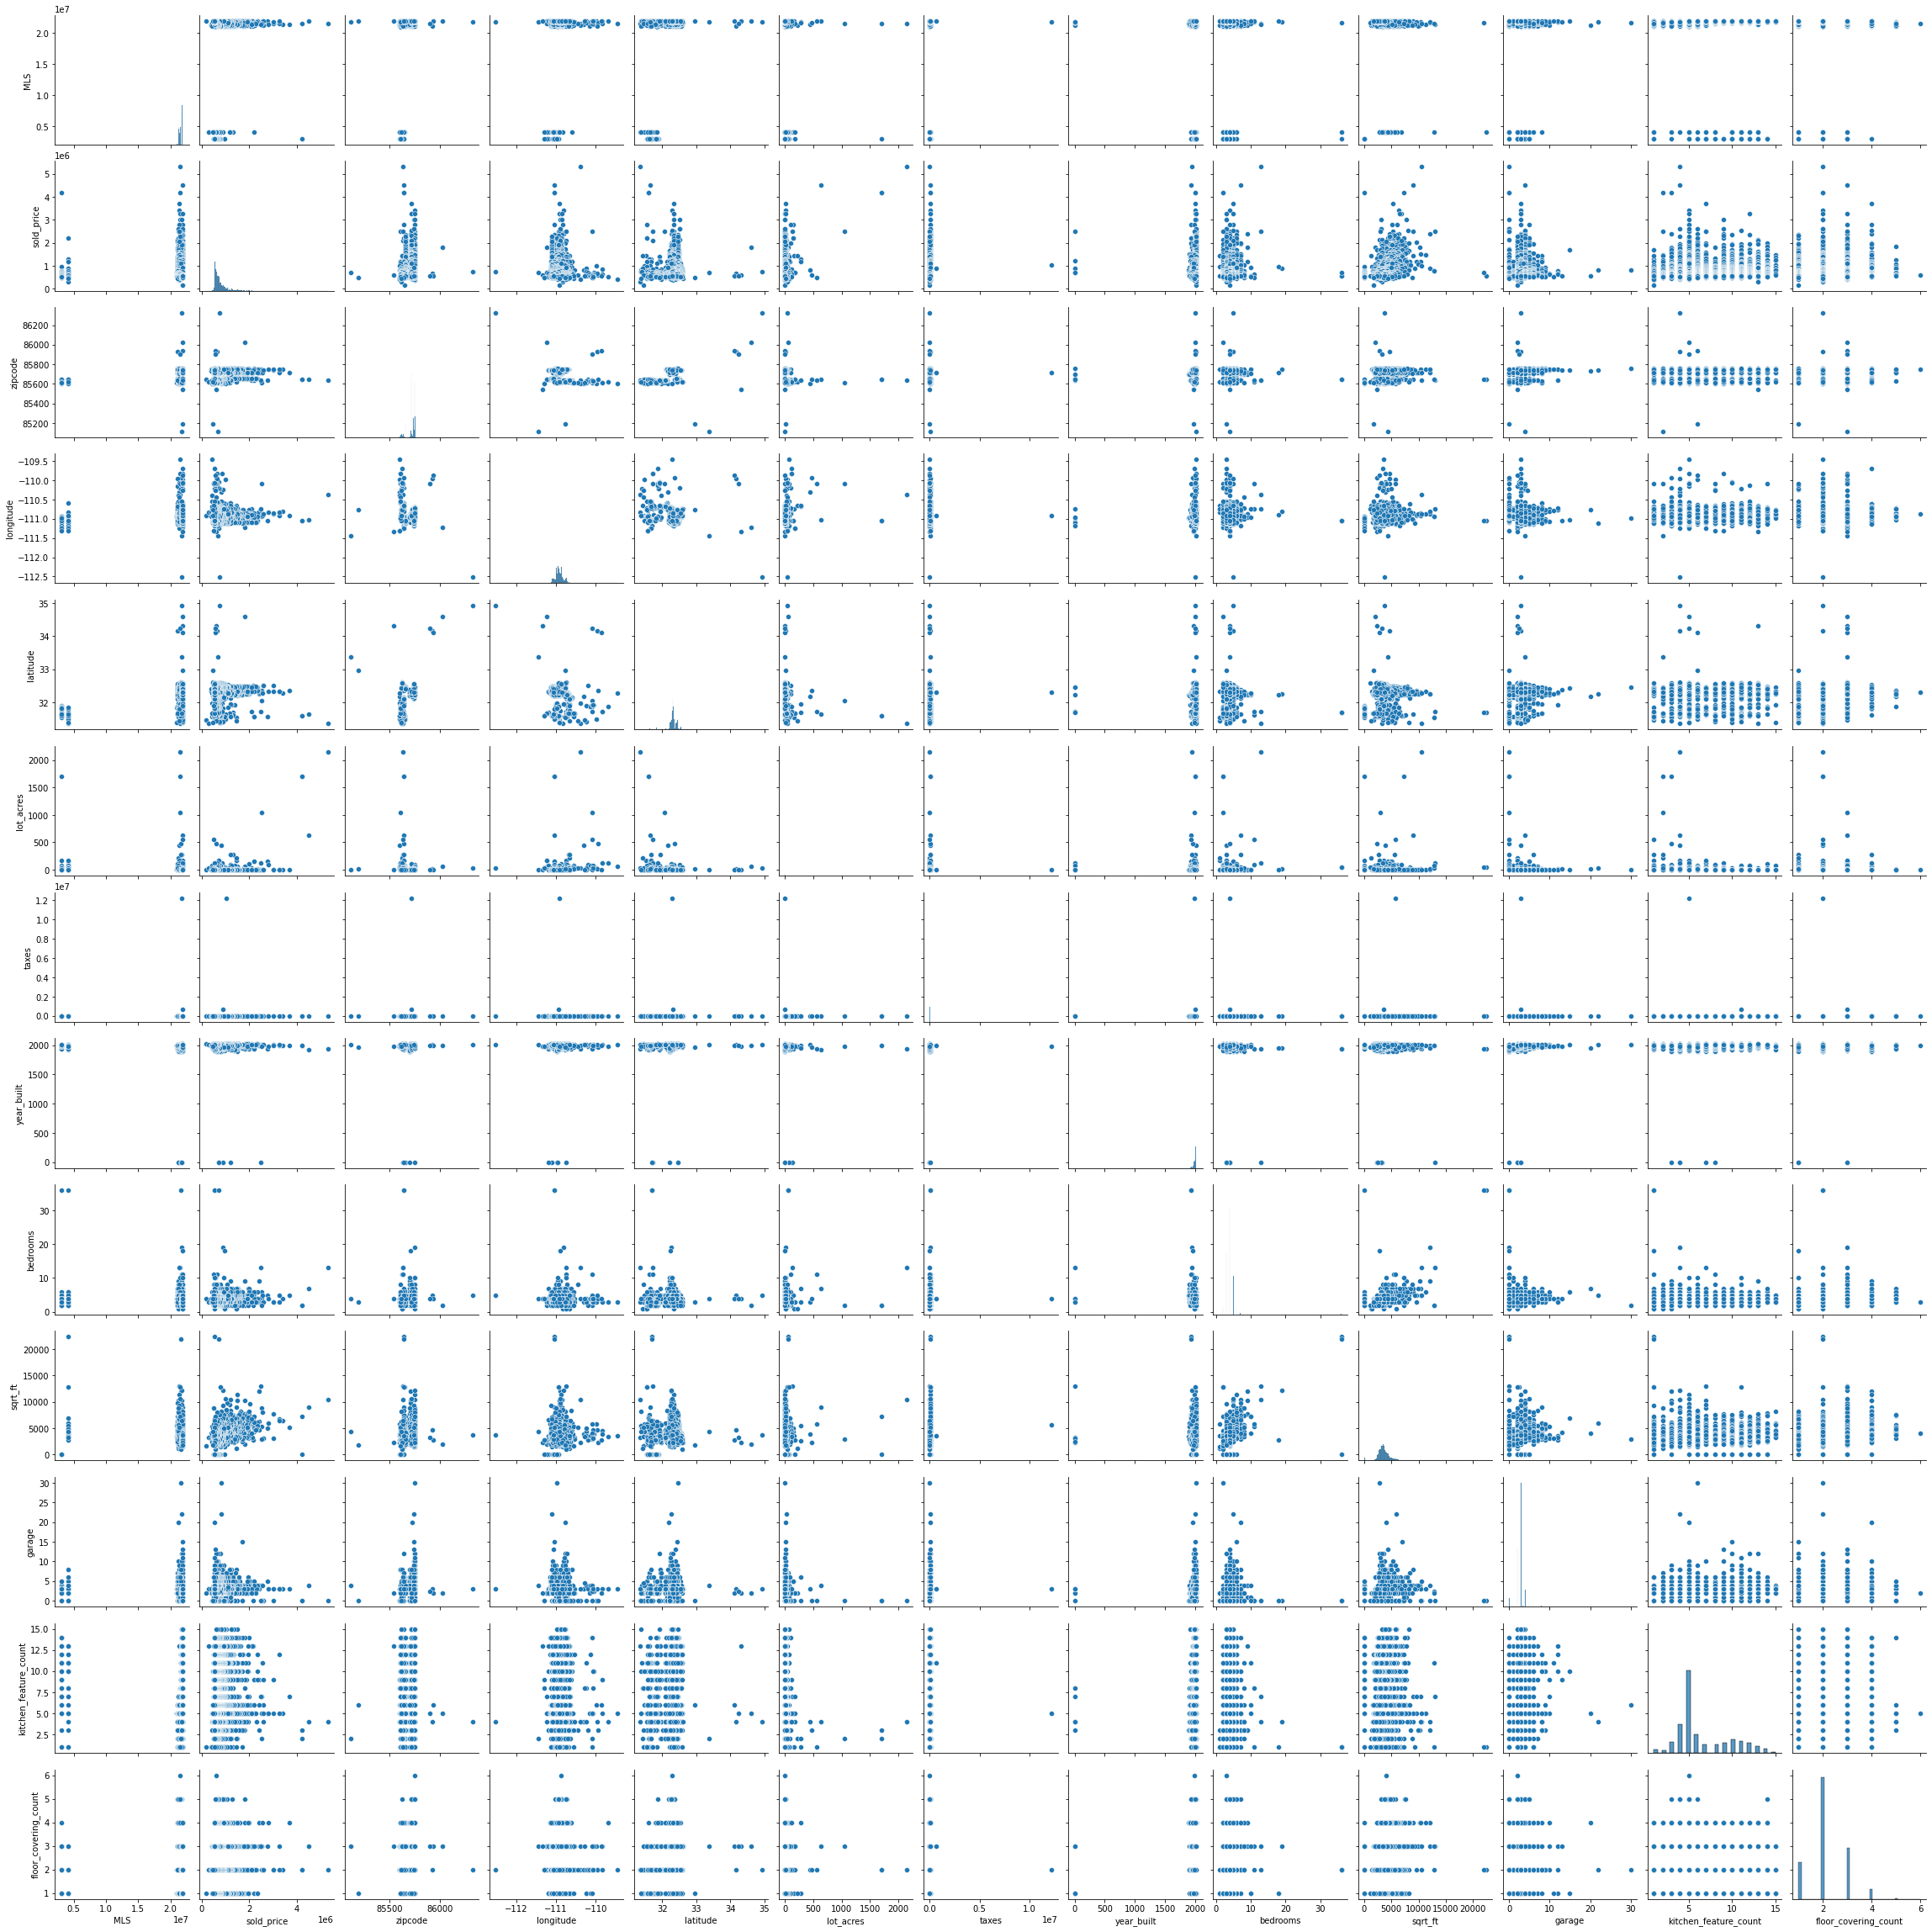

In [58]:
sns.pairplot(df)


In [59]:
#sns.distplot(df['bedrooms'], bins=5)

In [60]:
#
#sns.catplot(x='bedrooms',kind='box', data=df)